In [1]:
import rosbag
import numpy as np
import sys
import csi_utils.constants as constants
import csi_utils.transform_utils as transform_utils
import csi_utils.pipeline_utils as pipeline_utils
import csi_utils.comp_utils as comp_utils
import csi_utils.synthetic_channel as synthetic_channel
import matplotlib.pyplot as plt
import matplotlib.colors as mc
%matplotlib widget
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from matplotlib.cm import ScalarMappable
# import mne
import tqdm
import importlib
import matplotlib.pyplot as plt
# import cv2

Image shape: (25, 25)


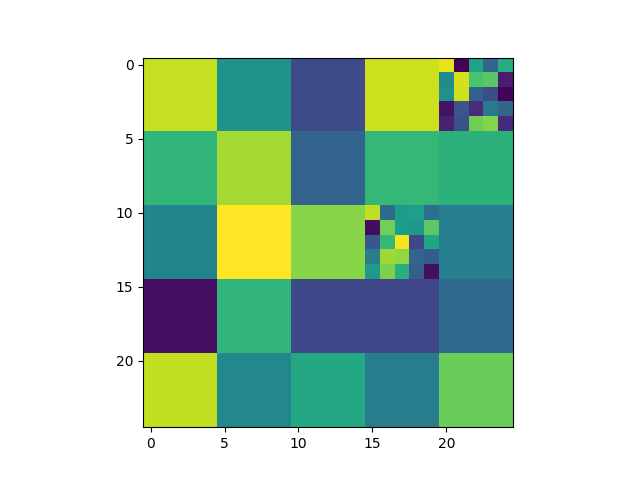

In [2]:
import csi_utils.music_algorithms as ma
plt.cla()
importlib.reload(ma)
granularity = 5
arr1 = ma.MusicResults(np.random.rand(granularity, granularity), 0, 0)
arr2 = ma.MusicResults(np.random.rand(granularity, granularity), 0, 0)
arr3 = ma.MusicResults(np.random.rand(granularity, granularity), 0, 0)
arr1.add_maximum(2, 3, arr2)
arr1.add_maximum(0, 4, arr3)
plt.imshow(arr1.renderIntoImg())

plt.show()

In [3]:
frequency = np.mean(np.array(constants.get_channel_frequencies(157, 20e6)))
speed_of_light = 3e8
wavelength = speed_of_light / frequency
num_rx = 4
simulated_rx_pos = [(0, -wavelength * i / 2) for i in range(num_rx)]
def steeringVectorFunction(theta, phi):
  return synthetic_channel.aoa_aod_steering_matrix(theta, phi, simulated_rx_pos, simulated_rx_pos, np.array([frequency]))[0].flatten()

In [8]:
channel = synthetic_channel.create_channel(num_rx=num_rx, num_tx=num_rx, paths=[(20, 30, 5), (50, -20, 5), (-20, 0, 5)], frequencies=constants.get_channel_frequencies(157,20e6), rx_positions=simulated_rx_pos, tx_positions=simulated_rx_pos, tof=None, noiseStrength=2, degrees=True, correlation=None).reshape(-1, num_rx**2)
print(channel.shape)
channelCovariance = channel.T @ channel.conj()
print(channelCovariance.shape)

0.051855452924971644
(50, 16)
(16, 16)


Image shape: (400, 400)


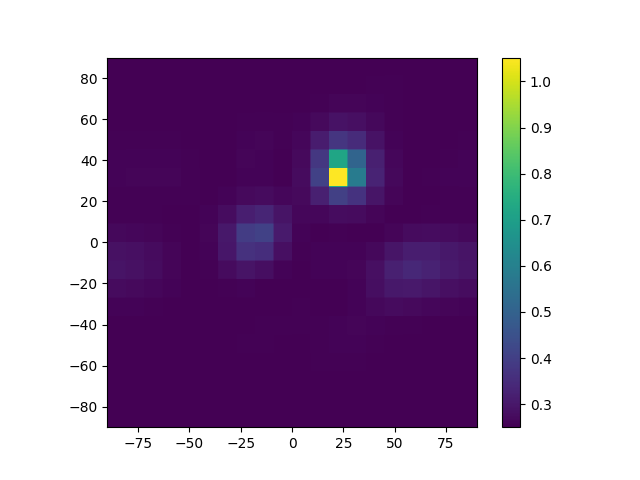

In [11]:
import csi_utils.synthetic_channel as synthetic_channel
importlib.reload(ma)
plt.cla()
plt.clf()
results = ma.generic_music_fast(channelCovariance, steeringVectorFunction, 2, 20, [-np.pi/2, np.pi/2], [-np.pi/2, np.pi/2], False, 0, showChosen=True)
plt.imshow(results.renderIntoImg().T, origin='lower', extent=[-90, 90, -90, 90])
plt.colorbar()
plt.show()